In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [2]:
df=pd.read_csv("weather.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


<AxesSubplot:xlabel='MinTemp'>

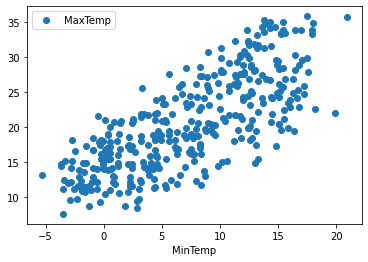

In [3]:
df.plot(x='MinTemp',y='MaxTemp',style='o')

In [4]:
x=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
LR=LinearRegression()

In [7]:
LR.fit(x_train,y_train)  #main training step

LinearRegression()

In [8]:
y_predict=LR.predict(x_test)

In [9]:
data=pd.DataFrame({'Actual':y_test.flatten(),'Predict':y_predict.flatten()})

In [10]:
data1=data.head(20)
data1

,Actual,Predict
0,13.8,17.448273
1,22.2,25.702146
2,24.2,28.569281
3,20.7,26.657858
4,17.1,14.581138
5,27.1,24.051371
6,24.8,27.092272
7,22.6,29.959407
8,34.2,25.962795
9,14.0,14.146723


<AxesSubplot:>

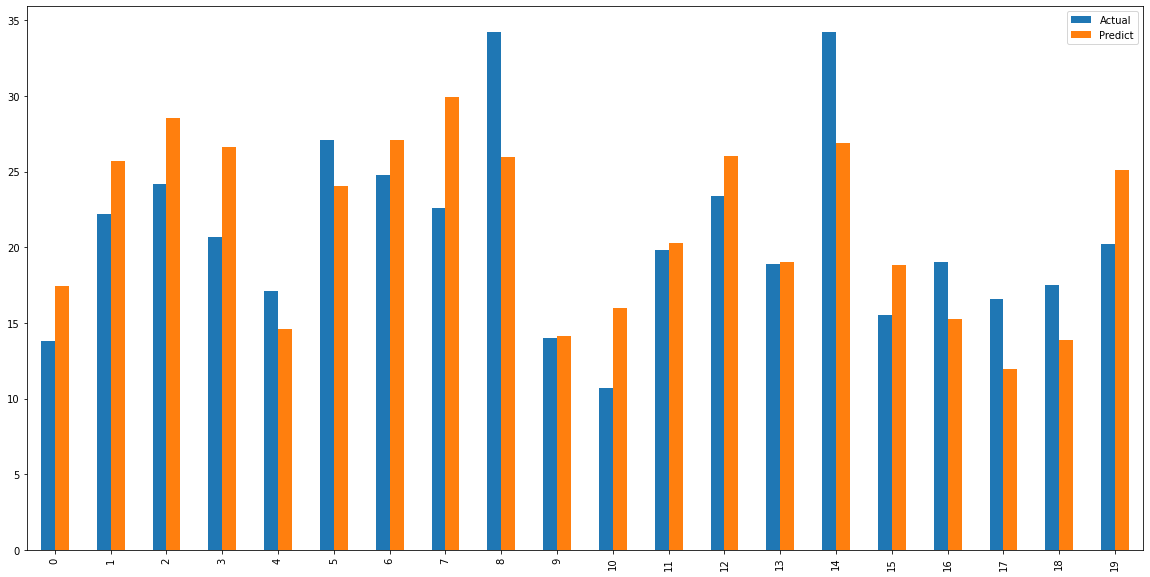

In [11]:
data1.plot(kind='bar',figsize=(20,10))

# Fitting line in graph

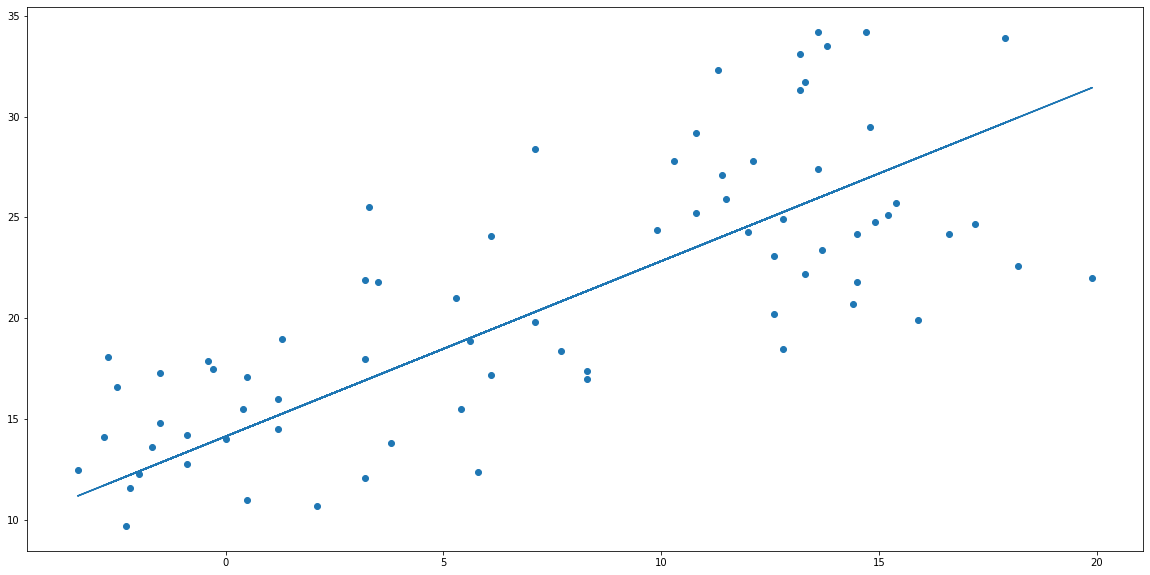

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict)

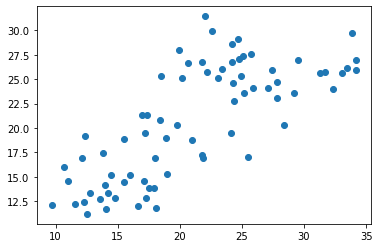

In [13]:
plt.scatter(y_test,y_predict)

C:\Users\nanim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

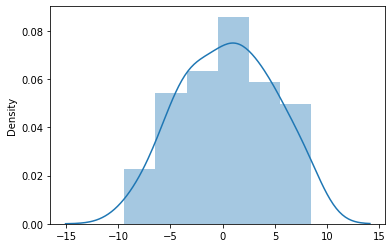

In [14]:
sns.distplot(y_test-y_predict)

In [15]:
# we can also find the coefficent or slope(beta 1) and intercept(beta 0)

In [16]:
print("intercept :",LR.intercept_)
print("coefficent:",LR.coef_)

intercept : [14.14672329]
coefficent: [[0.86882878]]


In [17]:
# three types of errors

In [18]:
print("error:",metrics.mean_squared_error(y_test,y_predict))

error: 19.473452273135518


In [19]:
print("error:",metrics.mean_absolute_error(x_test,y_predict))

error: 13.157975908526154


In [20]:
print("error:",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

error: 4.412873471235666


# ANOTHER DATA SET

In [21]:
data=pd.read_csv("predict_house_price.csv")
data.head()

,mean_of_area_income,mean_of_area_house_age,mean_area_number_of_rooms,mean_area_number_of_bedrooms,population,selling_price,Adress
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


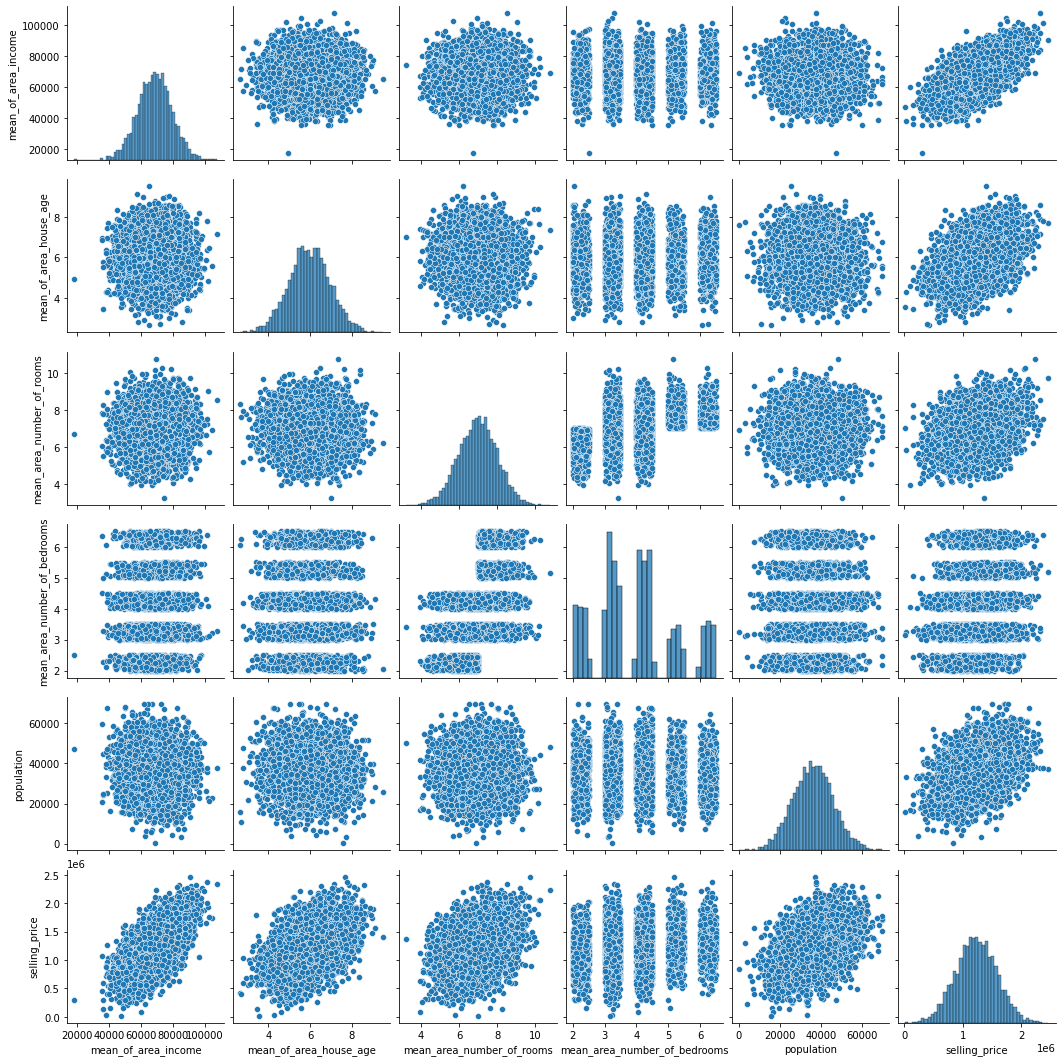

In [22]:
sns.pairplot(data)

In [23]:
x=data['mean_of_area_house_age'].values.reshape(-1,1)
y=data['selling_price'].values.reshape(-1,1)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [25]:
LR.fit(x_train,y_train)

LinearRegression()

In [26]:
y_predict=LR.predict(x_test)

In [27]:
data1=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_predict.flatten()})
data2=data1.head(20)
data2

,Actual,Predicted
0,8.008091e+05,1.110770e+06
1,1.620949e+06,1.325671e+06
2,1.219637e+06,1.308471e+06
3,1.172133e+06,1.066278e+06
4,8.644838e+05,1.286985e+06
5,1.153135e+06,1.268407e+06
6,1.178272e+06,1.104452e+06
7,8.218591e+05,9.950481e+05
8,1.266947e+06,1.012882e+06
9,1.636559e+06,1.157806e+06


<AxesSubplot:>

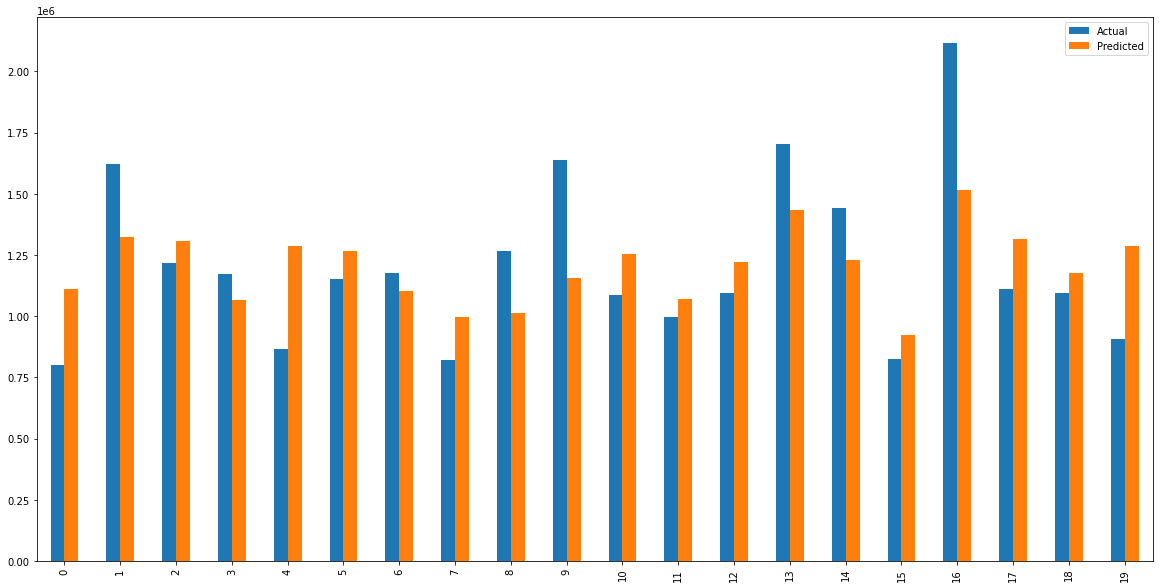

In [28]:
data2.plot(kind='bar',figsize=(20,10))

In [29]:
data.columns

Index(['mean_of_area_income', 'mean_of_area_house_age',
       'mean_area_number_of_rooms', 'mean_area_number_of_bedrooms',
       'population', 'selling_price', 'Adress'],
      dtype='object')

In [30]:
x=data[['mean_of_area_income', 'mean_of_area_house_age',
       'mean_area_number_of_rooms', 'mean_area_number_of_bedrooms',
       'population']]
y=data['selling_price']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [32]:
LR.fit(x_train,y_train)

LinearRegression()

In [33]:
y_predict = LR.predict(x_test)

In [34]:
data3 = pd.DataFrame({'Actual':y_test,'Predict':y_predict})
data4=data3.head(20)
data4

,Actual,Predict
789,8.008091e+05,8.137531e+05
2507,1.620949e+06,1.561341e+06
2376,1.219637e+06,1.322583e+06
1378,1.172133e+06,1.190216e+06
598,8.644838e+05,9.682604e+05
1589,1.153135e+06,1.249860e+06
2580,1.178272e+06,1.191759e+06
366,8.218591e+05,7.337466e+05
2320,1.266947e+06,1.216582e+06
1247,1.636559e+06,1.538401e+06


<AxesSubplot:>

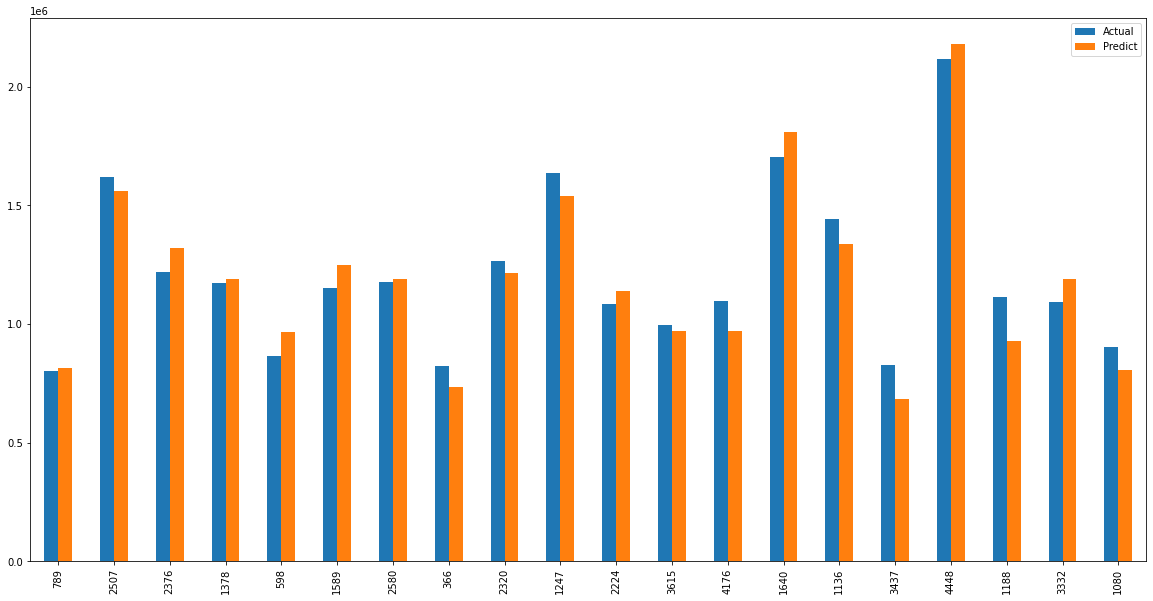

In [35]:
data4.plot(kind='bar',figsize=(20,10))

In [44]:
print("Acurracy of training : ",LR.score(x_train,y_train))
print("Acurracy of testing : ",LR.score(x_test,y_predict) )

Acurracy of training :  0.918077933587145
Acurracy of testing :  1.0


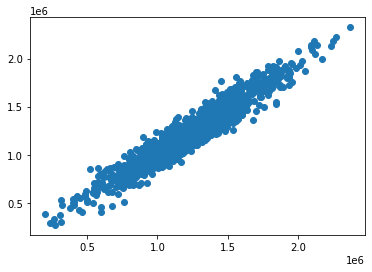

In [37]:
plt.scatter(y_test,y_predict)

C:\Users\nanim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

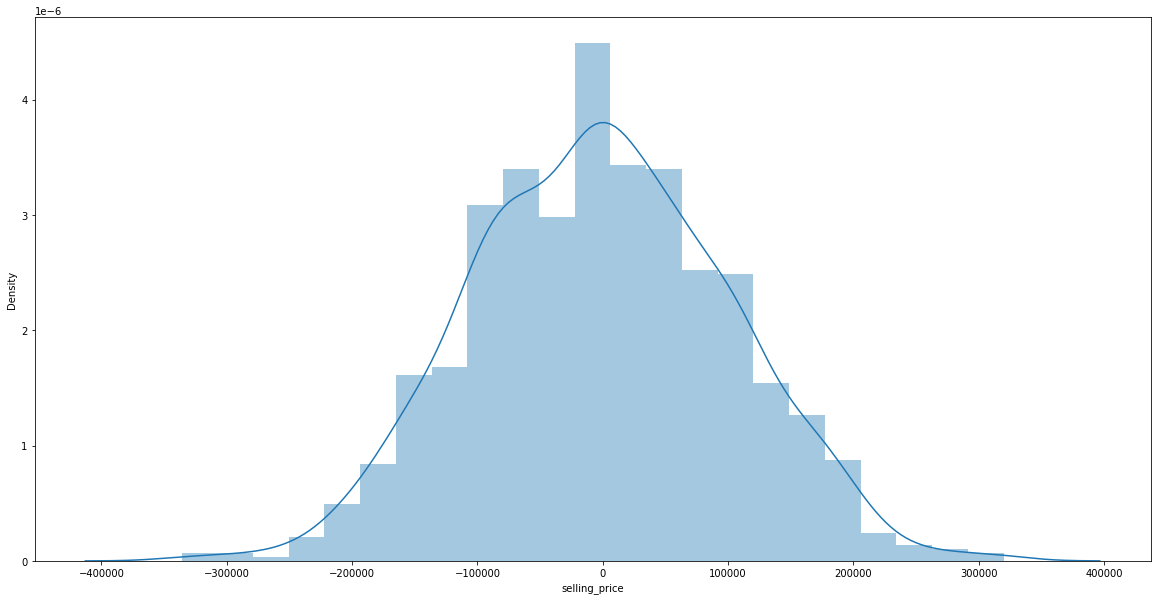

In [38]:
plt.figure(figsize=(20,10))
sns.distplot(y_test-y_predict)

<AxesSubplot:>

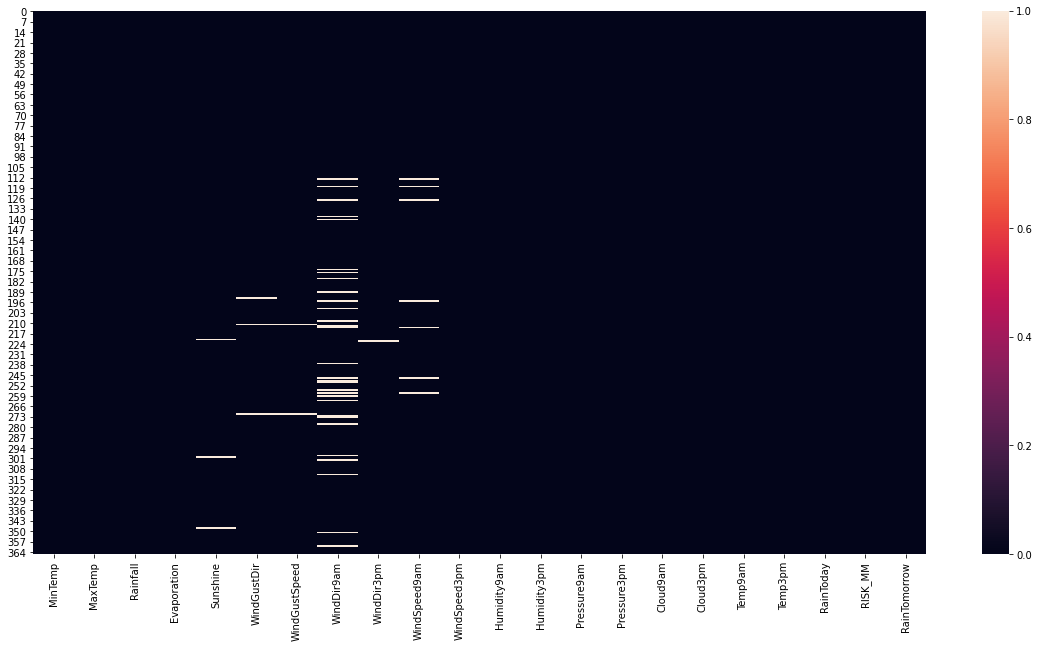

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [40]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [41]:
df.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindDir9am'>

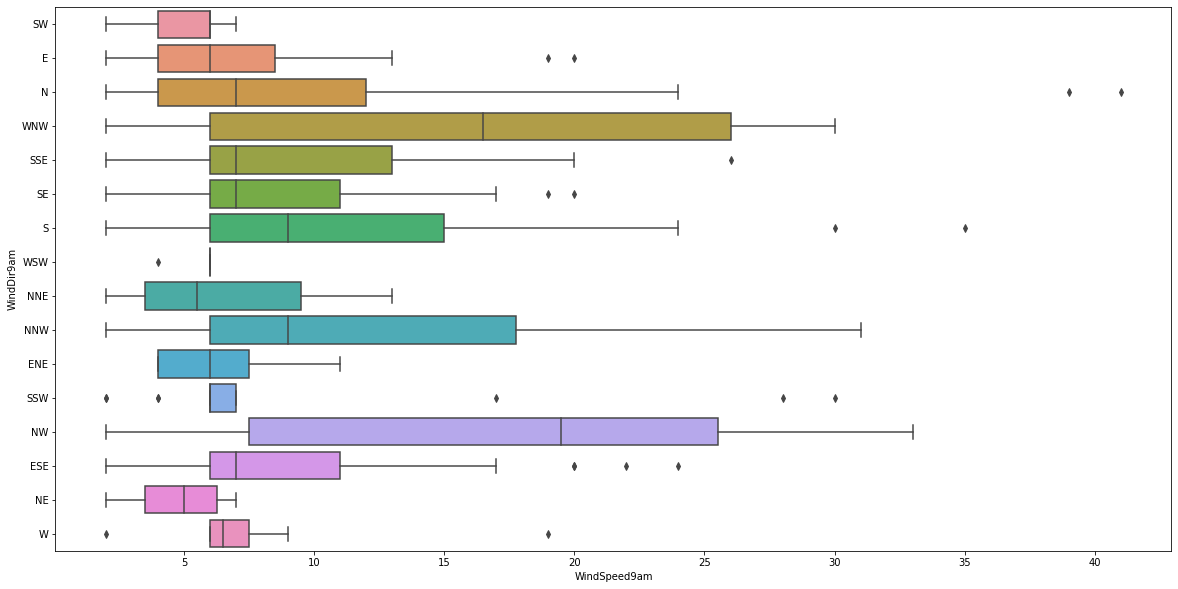

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x='WindSpeed9am',y='WindDir9am',data=df)